# **Lab 7: Clustering**

During this lecture lecture, we learned more about clustering problem. In this lab, we will see how to train models such as k-means and mean-shift using sklearn.





## Exercise 3: Hierarchical Clustering

We are going to use a dataset from UCI Machine Learning Repository which contains information related to customer from a wholesale distributor  (http://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

The columns are:
1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
7. CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8. REGION: customers Region: Lisnon, Oporto or Other (Nominal)

We will be loading the data here:
https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab07/ex2/wholesale_customers_scaled.csv

We will also compare the results to previous clusters found with k-means and mean-shift: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab07/ex3/wholesale_customers_clusters2.csv

We want to identify groups of customers with similar behaviors

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Train a mean-shift Model

---
### 0. Setup Environment

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

lab = LabExFolder(
  course_code="36106",
  lab="lab07",
  exercise="ex03"
)
lab.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/36106/labs/lab07/ex03/data


In [2]:
import warnings
warnings.simplefilter(action='ignore')

### 1. Load and Explore Dataset

**[1.1]** Import the pandas, numpy and altait packages

In [3]:
# Placeholder for student's code

In [4]:
# Solution
import pandas as pd
import numpy as np
import altair as alt

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called `df_scaled`

In [5]:
# Placeholder for student's code

In [6]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab07/ex2/wholesale_customers_scaled.csv'
df_scaled = pd.read_csv(file_url)

**[1.3]** Display the first 5 rows of `df_scaled`

In [7]:
# Placeholder for student's code

In [8]:
# Solution
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**[1.4]** Display the dimensions (shape) of `df_scaled`

In [9]:
# Placeholder for student's code

In [10]:
# Solution
df_scaled.shape

(440, 6)

**[1.5]** Load the second dataset into dataframe called `df`

In [11]:
# Placeholder for student's code

In [12]:
# Solution
df = pd.read_csv('https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab07/ex2/wholesale_customers_clusters.csv')

**[1.6]** Display the first 5 rows of `df`

In [13]:
# Placeholder for student's code

In [14]:
# Solution
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


### 2. Prepare Data

**[2.1]** Create a copy of `df` and save it into a variable called `df_cleaned`

In [15]:
# Placeholder for student's code

In [16]:
# Solution
X = df_scaled.copy()

## 3. Train an Agglomerative Clustering model


**[3.1]** Import AgglomerativeClustering from sklearn.cluster

In [17]:
# Placeholder for student's code

In [18]:
# Solution
from sklearn.cluster import AgglomerativeClustering

**[3.2]** Instantiate a AgglomerativeClustering with distance_threshold=0, n_clusters=None

In [19]:
# Placeholder for student's code

In [20]:
# Solution
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**[4.3]** Fit the model with the data

In [21]:
# Placeholder for student's code

In [22]:
# Solution
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**[3.4]** Copy the function to display a dendogram from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [23]:
# Placeholder for student's code

In [24]:
# Solution
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)

**[3.5]** Display the dendogram

In [25]:
# Placeholder for student's code

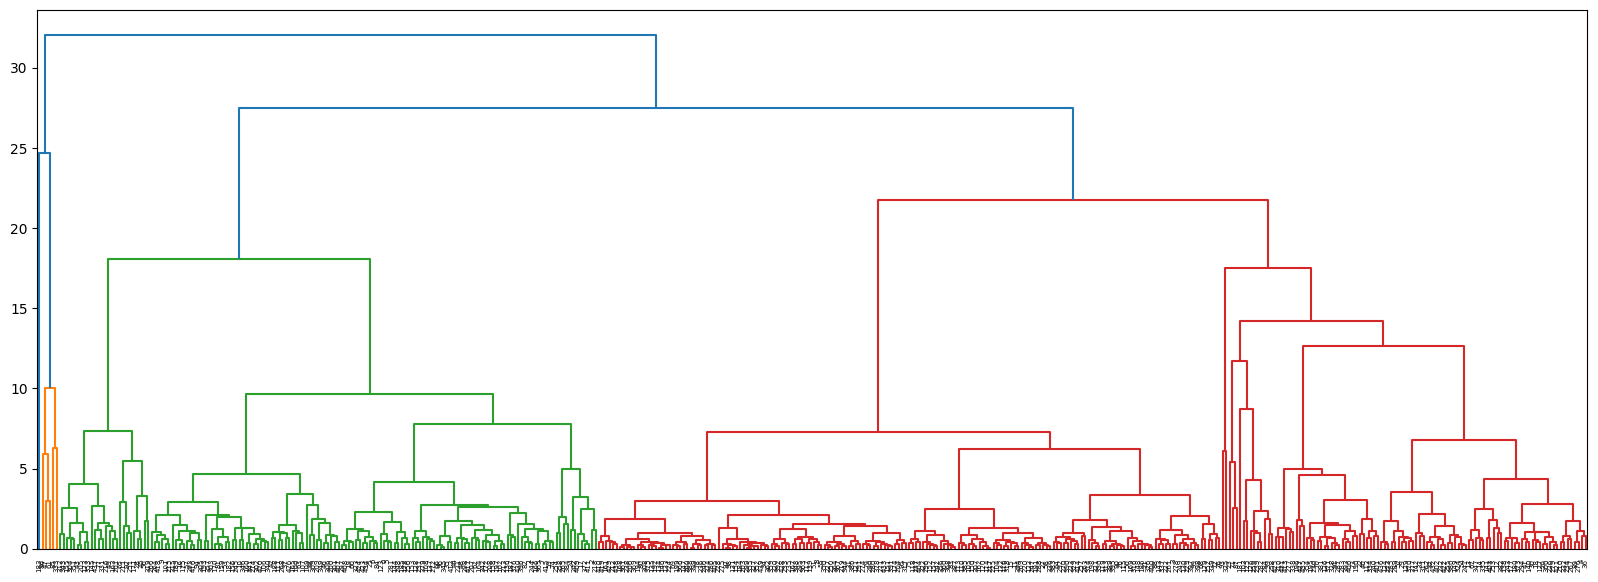

In [26]:
# Solution
plot_dendrogram(model)

**[3.6]** Display the dendogram for 3 clusters

In [27]:
# Placeholder for student's code

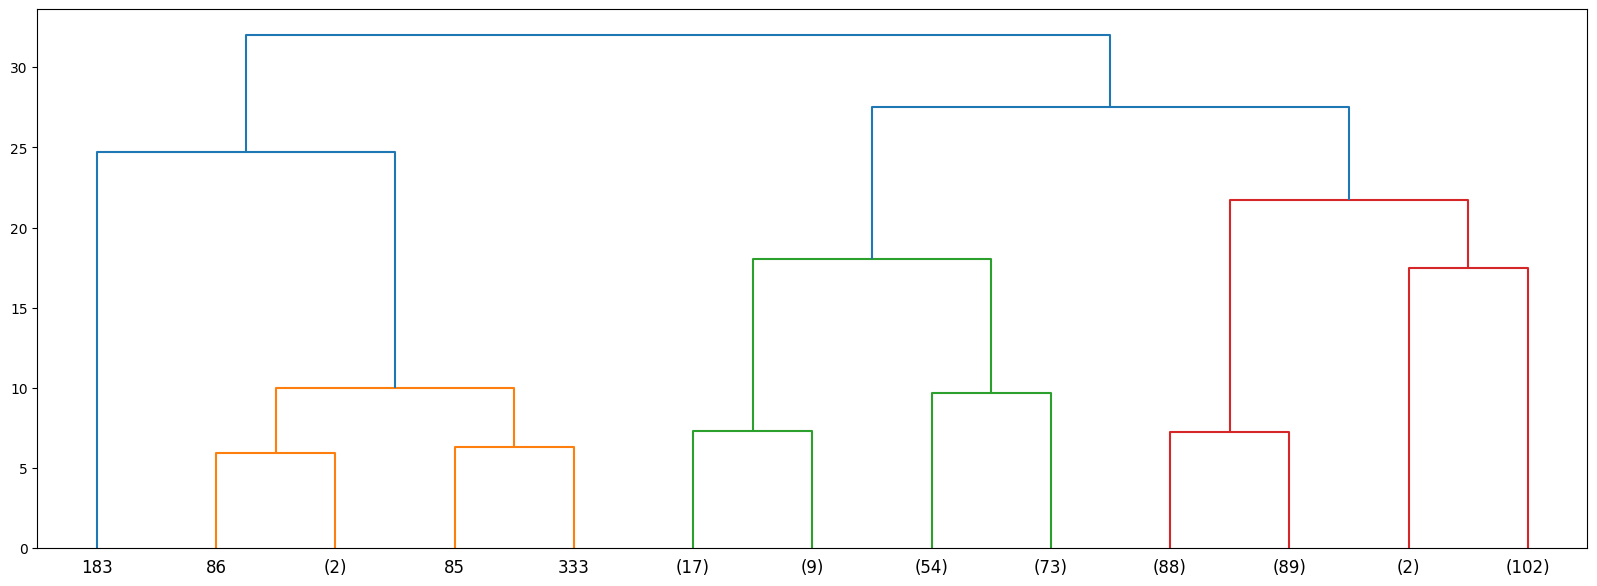

In [28]:
# Solution
plot_dendrogram(model, truncate_mode="level", p=3)

**[3.7]** Train another AgglomerativeClustering for 3 clusters only with the data and save the predictions back into df in a new column called aggcluster3

In [29]:
# Placeholder for student's code

In [30]:
# Solution
ac3 = AgglomerativeClustering(n_clusters = 3)
df['aggcluster3'] = ac3.fit_predict(X)

**[3.8]** Create a list of all the pairs from the features

In [31]:
# Solution
feat_list = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

In [32]:
pairs

[('Fresh', 'Milk'),
 ('Fresh', 'Grocery'),
 ('Fresh', 'Frozen'),
 ('Fresh', 'Detergents_Paper'),
 ('Fresh', 'Delicassen'),
 ('Milk', 'Grocery'),
 ('Milk', 'Frozen'),
 ('Milk', 'Detergents_Paper'),
 ('Milk', 'Delicassen'),
 ('Grocery', 'Frozen'),
 ('Grocery', 'Detergents_Paper'),
 ('Grocery', 'Delicassen'),
 ('Frozen', 'Detergents_Paper'),
 ('Frozen', 'Delicassen'),
 ('Detergents_Paper', 'Delicassen')]

**[3.9]** Print scatter plots to visualise the clusters

In [33]:
# Placeholder for student's code

In [34]:
# Solution
base = alt.Chart(df).mark_point().encode(color='aggcluster3:N')
for a, b in pairs:
  base.encode(x=a, y=b).display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**[3.10]** Display the average of all features for each group

In [35]:
# Placeholder for student's code

In [36]:
# Solution
df.groupby('aggcluster3').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans
aggcluster3,,,,,,,,,
0,1.833333,2.833333,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333,1.500000
1,1.085409,2.533808,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356,1.572954
2,1.738562,2.549020,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843,2.555556


**[3.11]** Display the first 20 rows of df

In [37]:
# Placeholder for student's code

In [38]:
# Solution
df.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans,aggcluster3
0,2,3,12669,9656,7561,214,2674,1338,2,2
1,2,3,7057,9810,9568,1762,3293,1776,3,2
2,2,3,6353,8808,7684,2405,3516,7844,3,2
3,1,3,13265,1196,4221,6404,507,1788,2,1
4,2,3,22615,5410,7198,3915,1777,5185,0,1
5,2,3,9413,8259,5126,666,1795,1451,2,2
6,2,3,12126,3199,6975,480,3140,545,2,2
7,2,3,7579,4956,9426,1669,3321,2566,2,2
8,1,3,5963,3648,6192,425,1716,750,2,1
9,2,3,6006,11093,18881,1159,7425,2098,3,2
